In [1]:
import torch
import torch.nn as nn

import torchvision
from torchvision import datasets, transforms


import numpy as np
import matplotlib.pyplot as plt


### Load saved state dicts onto the pretrained model

In [2]:
from torchvision import models
pretrained_densenet161 = models.densenet161(pretrained=True)


In [3]:
state_dict = torch.load('densenet161_40000Iterations.pth',map_location='cuda:0')

from torchvision import models
model = models.densenet161(pretrained=True)
model.classifier = nn.Linear(in_features=2208, out_features=11)

model.load_state_dict(state_dict)

<All keys matched successfully>

### Metric functions to compare the networks

- Every dense block of the densenet-161 network has 2 conv layers.
- p1 and p2 represent the conv layers in the pretrained network on the ImageNet dataset.
- m1 and m2 represent the conv layers in the pretrained network on the C-20 target dataset.
- analyzer2() calculates the norm difference, cosine simularity, and sparsity between the corresponding conv layers.


In [4]:
# Cosine Similarity 
cos = nn.CosineSimilarity(dim=1, eps=1e-6)

In [5]:
def analyser2(p1, p2, m1, m2):

    
    diff1 = torch.norm(p1-m1).numpy()/torch.norm(p1)*100
    diff2 = torch.norm(p2-m2).numpy()/torch.norm(p2)*100
    
    c1 = cos(p1.view(1,-1), m1.view(1,-1)).numpy()
    c2 = cos(p2.view(1,-1), m2.view(1,-1)).numpy()
    
    comp1 = abs(m1) <= 1e-10*torch.ones(list(m1.shape))
    comp2 = abs(m2) <= 1e-10*torch.ones(list(m2.shape))
    
    s1 = torch.sum(comp1)/torch.sum(torch.ones(list(m1.shape)))*100
    s2 = torch.sum(comp2)/torch.sum(torch.ones(list(m2.shape)))*100
    
    diff = [diff1, diff2]
    
    cos_sim = [c1, c2]
    
    sparsity = [s1, s2]
    
    return diff, cos_sim,sparsity

### Loop over the dense layers and apply the metric functions on the conv layers  

- The saved lists diff, cos_sim, and sparsity correspond to the norm difference, cosine similarity, and sparsity of corresponding convolutional layers of the pretrained networks on the ImageNet dataset and the C-20 dataset respectively.


In [6]:
with torch.no_grad():
    diff = []
    cos_sim = []
    sparsity = []
    
    for k in ['denseblock1', 'denseblock2','denseblock3','denseblock4']:
        pre = pretrained_densenet161.features
        mod = model.features
        if k == 'denseblock1':
            obj_p = getattr(pre, k)
            obj_m = getattr(mod, k)
            
            denselayers = ['denselayer'+ str(iter) for iter in range(1,6+1)]
            for m in denselayers:

                obj_pp = getattr(obj_p, m)
                obj_mm = getattr(obj_m, m)

                p1 = obj_pp.conv1.weight
                p2 = obj_pp.conv2.weight

                m1 = obj_mm.conv1.weight
                m2 = obj_mm.conv2.weight

                result = analyser2(p1, p2, m1, m2)
                
                diff.extend(result[0])
                cos_sim.extend(result[1])
                sparsity.extend(result[2])
                
        
        if k == 'denseblock2':
            obj_p = getattr(pre, k)
            obj_m = getattr(mod, k)
            
            denselayers = ['denselayer'+ str(iter) for iter in range(1,12+1)]
            for m in denselayers:

                obj_pp = getattr(obj_p, m)
                obj_mm = getattr(obj_m, m)

                p1 = obj_pp.conv1.weight
                p2 = obj_pp.conv2.weight

                m1 = obj_mm.conv1.weight
                m2 = obj_mm.conv2.weight

                result = analyser2(p1, p2, m1, m2)
                
                diff.extend(result[0])
                cos_sim.extend(result[1])
                sparsity.extend(result[2])
                
        if k == 'denseblock3':
            obj_p = getattr(pre, k)
            obj_m = getattr(mod, k)
            
            denselayers = ['denselayer'+ str(iter) for iter in range(1,36+1)]
            for m in denselayers:

                obj_pp = getattr(obj_p, m)
                obj_mm = getattr(obj_m, m)

                p1 = obj_pp.conv1.weight
                p2 = obj_pp.conv2.weight

                m1 = obj_mm.conv1.weight
                m2 = obj_mm.conv2.weight

                result = analyser2(p1, p2, m1, m2)
                
                diff.extend(result[0])
                cos_sim.extend(result[1])
                sparsity.extend(result[2])
                
        if k == 'denseblock4':
            obj_p = getattr(pre, k)
            obj_m = getattr(mod, k)
            
            denselayers = ['denselayer'+ str(iter) for iter in range(1,24+1)]
            for m in denselayers:

                obj_pp = getattr(obj_p, m)
                obj_mm = getattr(obj_m, m)

                p1 = obj_pp.conv1.weight
                p2 = obj_pp.conv2.weight

                m1 = obj_mm.conv1.weight
                m2 = obj_mm.conv2.weight

                result = analyser2(p1, p2, m1, m2)
                
                diff.extend(result[0])
                cos_sim.extend(result[1])
                sparsity.extend(result[2])
                

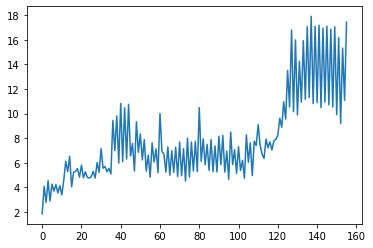

In [7]:
plt.plot(diff)

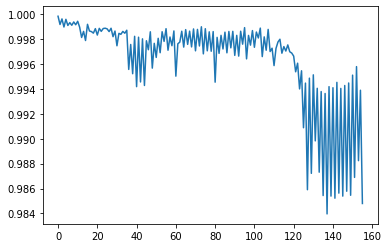

In [8]:

plt.plot(cos_sim)

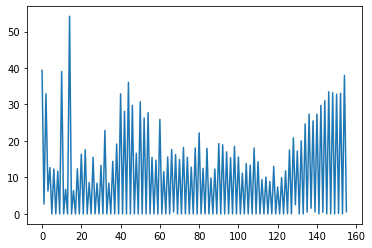

In [9]:
plt.plot(sparsity)

### Save the results

In [10]:
from numpy import savetxt

normdiff = np.array(diff)
cos_sim = np.array(cos_sim)

savetxt('1_normdiff_densenet161.csv', normdiff, delimiter=',')
savetxt('1_cos_sim_densenet161.csv', cos_sim, delimiter=',')